In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import numpy.random as random
rng = np.random.default_rng()

import torch

import utils
import models
import cusp
import train_cSGM

import __main__

This notebook is a demonstration of training a conditional SGM on data from a deterministic dynamical system to sample on its manifold. Consider the following system that describes a cusp bifurcation:
\
\
\begin{equation}
    \dot{x} =-x^3 + \lambda x + \mu
\end{equation}
\
\
We can take samples from this system and discard the transients to see a 2-D manifold in 3-D space. The system experiences a bifurcation where it goes from one steady state to three steady states.

In [2]:
data, data_0, data_1, data_3 = cusp.train_data_gen()

/scratch4/ykevrek1/users/ecrabtr2/Assisted_sampling_example/cusp.py:28: RuntimeWarning: invalid value encountered in sqrt
  if data[i,0] < 2*data[i,1]/3*np.sqrt(data[i,1]/3) and data[i,0] > -2*data[i,1]/3*np.sqrt(data[i,1]/3):


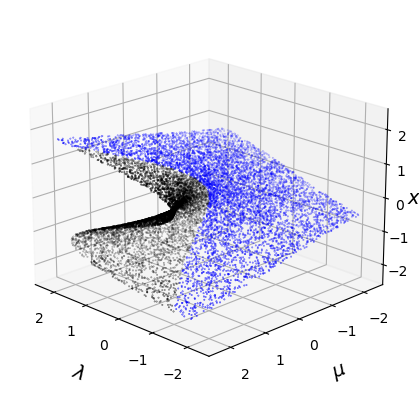

In [3]:
cusp.plot_cusp(data_1, data_3)

In [4]:
labels = data[:,0]

In [5]:
xs = torch.from_numpy(data[:,1:]).cpu()

In [6]:
step_rng = rng
cond_delta = 0.1
N_epochs = 5001
batch_size = 100
model_dir = './saved_models/cusp/'

In [7]:
score_model = train_cSGM.train(xs, labels, N_epochs, batch_size, cond_delta, model_dir)

Epoch 0 	, Loss 0.937913 
Epoch 500 	, Loss 0.632811 
Epoch 1000 	, Loss 0.579766 
Epoch 1500 	, Loss 0.443525 
Epoch 2000 	, Loss 0.360435 
Epoch 2500 	, Loss 0.458630 
Epoch 3000 	, Loss 0.354100 
Epoch 3500 	, Loss 0.442504 
Epoch 4000 	, Loss 0.524111 
Epoch 4500 	, Loss 0.437431 
Epoch 5000 	, Loss 0.520438 


In [8]:
setattr(__main__, "ScoreNet", models.ScoreNet)
score_model2 = torch.load('./saved_models/cusp/global_step_005000.pth')


y = torch.full((5000,), 0)
trained_score = lambda x, t: score_model2(x.float(), t.float(), y.int())
samples = utils.reverse_sde(step_rng, 2, 5000, utils.drift, utils.diffusivity, trained_score)

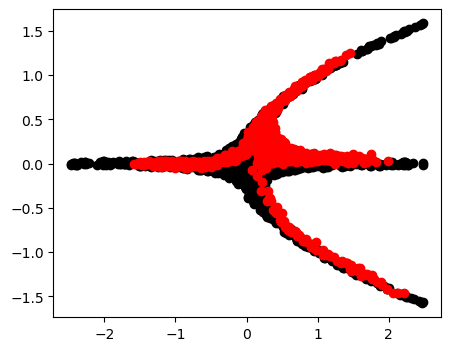

In [9]:
fig = plt.figure(figsize=(5,4))
plt.scatter(data_0[:,1], data_0[:,2], c='k')
plt.scatter(samples[:,0], samples[:,1], c='r')